<a href="https://colab.research.google.com/github/Poornima-Devi/CNN/blob/main/optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import neccessary libraries

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x,vy,ty,ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation loss")
  ax.plot(x, ty, 'r', label="Train loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

Loading MNIST Data

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
print("Number of training samples:", X_train.shape[0], "and each image is of shape (%d,%d)" %(X_train.shape[1], (X_train.shape[2])))
print("Number of testing samples:", X_test.shape[0], "and each image is of shape (%d,%d)" %(X_test.shape[1], (X_test.shape[2])))

Number of training samples: 60000 and each image is of shape (28,28)
Number of testing samples: 10000 and each image is of shape (28,28)


For each image we have a (28*28) vector

We will convert the (28 * 28) vector into single dimensional vector of 1*784

In [8]:
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

After converting input images

In [10]:
print("Number of training samples:", X_train.shape[0], "and each image is of shape (%d)" %(X_train.shape[1]))
print("Number of testing samples:", X_test.shape[0], "and each image is of shape (%d)" %(X_test.shape[1]))

Number of training samples: 60000 and each image is of shape (784)
Number of testing samples: 10000 and each image is of shape (784)


If we observe the above metrics each cell is having a value between 0-255,

before we move to apply machine learning algorithm lets normalize the data

X=> (X-Xmin)/(Xmax-Xmin) = X/255

In [11]:
X_train = X_train/255
X_test= X_test/255

Here we are having a class number for each image.

Lets convert this into a 10 dimensional vector.

For example: consider an image 5, convert it into 5 => [0,0,0,0,0,1,0,0,0,0]


In [12]:
print("Class label of first image:", y_train[0])

Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

print("After converting the output into a vector:", Y_train[0])

Class label of first image: 5
After converting the output into a vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [15]:
output_dim= 10
input_dim= X_train.shape[1]

batch_size=128
epoch=5

In [29]:
from tensorflow.keras.layers import BatchNormalization

In [31]:
from keras.layers import Dropout

The architecture with 3 hidden layers and a softmax layer.

In [33]:
s2_model= Sequential()
s2_model.add(Dense(622, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed= None)))
s2_model.add(BatchNormalization())
s2_model.add(Dropout(0.5))

s2_model.add(Dense(312, activation="relu", input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed= None)))
s2_model.add(BatchNormalization())
s2_model.add(Dropout(0.5))

s2_model.add(Dense(144, activation="relu", input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed= None)))
s2_model.add(BatchNormalization())
s2_model.add(Dropout(0.5))

s2_model.add(Dense(output_dim, activation='softmax'))

s2_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 622)               488270    
_________________________________________________________________
batch_normalization_2 (Batch (None, 622)               2488      
_________________________________________________________________
dropout_1 (Dropout)          (None, 622)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 312)               194376    
_________________________________________________________________
batch_normalization_3 (Batch (None, 312)               1248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 312)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 144)              

In [ ]:
SGD Optimizer

In [36]:
s2_model.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])

history= s2_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data= (X_test, Y_test))


Epoch 1/5
469/469 [==============================] - 8s 14ms/step - loss: 3.0515 - accuracy: 0.1493 - val_loss: 1.6290 - val_accuracy: 0.4563
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 1.9612 - accuracy: 0.3349 - val_loss: 1.4368 - val_accuracy: 0.5505
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 1.7132 - accuracy: 0.4160 - val_loss: 1.3269 - val_accuracy: 0.5952
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 1.6289 - accuracy: 0.4459 - val_loss: 1.2522 - val_accuracy: 0.6207
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 1.5500 - accuracy: 0.4730 - val_loss: 1.1823 - val_accuracy: 0.6405


Test score: 1.1823062896728516
Test accuracy: 0.640500009059906


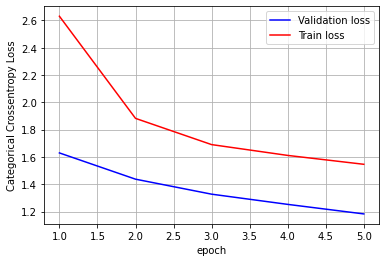

In [41]:
score= s2_model.evaluate(X_test,Y_test, verbose=0)
print("Test score:", score[0])
print("Test accuracy:", score[1])

fig,ax= plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x= list(range(1, epoch+1))
vy= history.history['val_loss']
ty= history.history['loss']
plt_dynamic(x,vy,ty,ax)

AdaGrad optimizer.

In [42]:
s2_model.compile(optimizer="Adagrad", loss='categorical_crossentropy', metrics=['accuracy'])

history= s2_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, Y_test))


Epoch 1/5
469/469 [==============================] - 8s 14ms/step - loss: 1.5199 - accuracy: 0.4856 - val_loss: 1.1676 - val_accuracy: 0.6450
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 1.5167 - accuracy: 0.4834 - val_loss: 1.1528 - val_accuracy: 0.6489
Epoch 3/5
469/469 [==============================] - 6s 14ms/step - loss: 1.4965 - accuracy: 0.4915 - val_loss: 1.1392 - val_accuracy: 0.6533
Epoch 4/5
469/469 [==============================] - 6s 14ms/step - loss: 1.4794 - accuracy: 0.4959 - val_loss: 1.1242 - val_accuracy: 0.6593
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 1.4624 - accuracy: 0.5051 - val_loss: 1.1089 - val_accuracy: 0.6651


Test score: 1.1089303493499756
Test accuracy: 0.6650999784469604


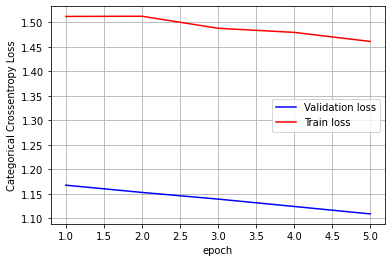

In [43]:
score= s2_model.evaluate(X_test,Y_test, verbose=0)
print("Test score:", score[0])
print("Test accuracy:", score[1])

fig,ax= plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x= list(range(1, epoch+1))
vy= history.history['val_loss']
ty= history.history['loss']
plt_dynamic(x,vy,ty,ax)

Adadelta optimizer

In [44]:
s2_model.compile(optimizer="Adadelta", loss='categorical_crossentropy', metrics=['accuracy'])

history= s2_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 1.4499 - accuracy: 0.5049 - val_loss: 1.1053 - val_accuracy: 0.6669
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 1.4613 - accuracy: 0.5033 - val_loss: 1.1047 - val_accuracy: 0.6669
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 1.4455 - accuracy: 0.5086 - val_loss: 1.1046 - val_accuracy: 0.6658
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 1.4596 - accuracy: 0.5029 - val_loss: 1.1023 - val_accuracy: 0.6676
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 1.4504 - accuracy: 0.5089 - val_loss: 1.0958 - val_accuracy: 0.6687


Test score: 1.0958492755889893
Test accuracy: 0.6686999797821045


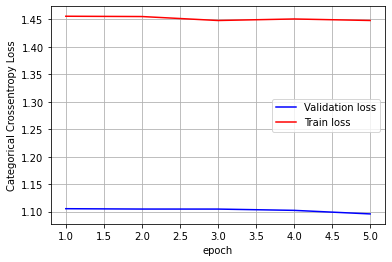

In [45]:
score= s2_model.evaluate(X_test,Y_test, verbose=0)
print("Test score:", score[0])
print("Test accuracy:", score[1])

fig,ax= plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x= list(range(1, epoch+1))
vy= history.history['val_loss']
ty= history.history['loss']
plt_dynamic(x,vy,ty,ax)

RMSProp optimizer

In [46]:
s2_model.compile(optimizer="RMSProp", loss='categorical_crossentropy', metrics=['accuracy'])

history= s2_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 9s 17ms/step - loss: 0.9640 - accuracy: 0.6811 - val_loss: 0.2760 - val_accuracy: 0.9167
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.4579 - accuracy: 0.8573 - val_loss: 0.2036 - val_accuracy: 0.9363
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 0.3403 - accuracy: 0.8976 - val_loss: 0.1678 - val_accuracy: 0.9493
Epoch 4/5
469/469 [==============================] - 8s 16ms/step - loss: 0.2862 - accuracy: 0.9145 - val_loss: 0.1475 - val_accuracy: 0.9531
Epoch 5/5
469/469 [==============================] - 8s 16ms/step - loss: 0.2373 - accuracy: 0.9277 - val_loss: 0.1290 - val_accuracy: 0.9592


Test score: 0.1289772093296051
Test accuracy: 0.9592000246047974


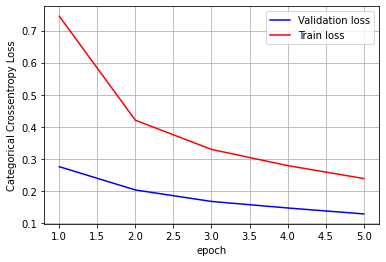

In [47]:
score= s2_model.evaluate(X_test,Y_test, verbose=0)
print("Test score:", score[0])
print("Test accuracy:", score[1])

fig,ax= plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x= list(range(1, epoch+1))
vy= history.history['val_loss']
ty= history.history['loss']
plt_dynamic(x,vy,ty,ax)

Adam optimizer

In [48]:
s2_model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

history= s2_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2143 - accuracy: 0.9347 - val_loss: 0.1158 - val_accuracy: 0.9637
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1937 - accuracy: 0.9419 - val_loss: 0.1065 - val_accuracy: 0.9670
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1765 - accuracy: 0.9467 - val_loss: 0.1006 - val_accuracy: 0.9678
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1612 - accuracy: 0.9506 - val_loss: 0.0936 - val_accuracy: 0.9704
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1500 - accuracy: 0.9549 - val_loss: 0.0884 - val_accuracy: 0.9725


Test score: 0.08843984454870224
Test accuracy: 0.9725000262260437


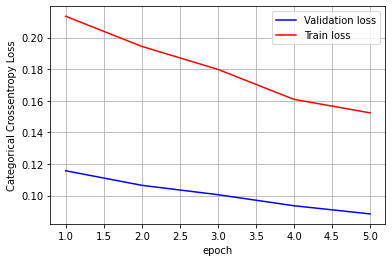

In [49]:
score= s2_model.evaluate(X_test,Y_test, verbose=0)
print("Test score:", score[0])
print("Test accuracy:", score[1])

fig,ax= plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x= list(range(1, epoch+1))
vy= history.history['val_loss']
ty= history.history['loss']
plt_dynamic(x,vy,ty,ax)

From above observations we can conclude that Adam optimizer is the best optimizer so far because it reaches its minima in very less number of epochs as compared to other optimizers . SGD is the slowest optimizer .